In [1]:
DATA_PATH = "subtropical_humid_region.csv"
import pandas as pd
df = pd.read_csv(DATA_PATH)


In [2]:
df.shape

(2557, 8)

In [3]:
df.head()

,Date,Population,T avg C,D.P avg C,humidity,Average wind speed(Kmh),Ppt avg (in),water consumption(m3)
0,1/1/year 1,2789,11.111111,1.111111,57.5,48.336527,0.0,1824.643328
1,1/2/year 1,3554,11.666667,2.222222,59.0,48.336527,0.0,1883.771432
2,1/3/year 1,3554,12.222222,3.333333,58.5,48.264107,0.0,1802.157993
3,1/4/year 1,3554,11.111111,3.888889,66.0,48.248013,0.0,1810.485895
4,1/5/year 1,3554,12.777778,5.555556,62.0,48.360667,0.0,1859.620517


In [4]:
df.columns

Index(['Date ', 'Population', 'T avg C', 'D.P avg C', 'humidity',
       'Average wind speed(Kmh)', 'Ppt avg (in)', 'water consumption(m3)'],
      dtype='object')

In [5]:
year_mapping = {
    'year 1': '2017',
    'year 2': '2018',
    'year 3': '2019',
    'year 4': '2020',
    'year 5': '2021',
    'year 6': '2022',
    'year 7': '2023'
}
df['Date'] = df['Date '].apply(lambda x: "/".join([x.split("/")[0], x.split("/")[1], year_mapping[x.split("/")[2]]]))
df = df.drop(['Date '], axis=1)


In [6]:
df.head()

,Population,T avg C,D.P avg C,humidity,Average wind speed(Kmh),Ppt avg (in),water consumption(m3),Date
0,2789,11.111111,1.111111,57.5,48.336527,0.0,1824.643328,1/1/2017
1,3554,11.666667,2.222222,59.0,48.336527,0.0,1883.771432,1/2/2017
2,3554,12.222222,3.333333,58.5,48.264107,0.0,1802.157993,1/3/2017
3,3554,11.111111,3.888889,66.0,48.248013,0.0,1810.485895,1/4/2017
4,3554,12.777778,5.555556,62.0,48.360667,0.0,1859.620517,1/5/2017


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

In [8]:
df

,Population,T avg C,D.P avg C,humidity,Average wind speed(Kmh),Ppt avg (in),water consumption(m3),Date
0,2789,11.111111,1.111111,57.5,48.336527,0.0,1824.643328,2017-01-01
1,3554,11.666667,2.222222,59.0,48.336527,0.0,1883.771432,2017-01-02
2,3554,12.222222,3.333333,58.5,48.264107,0.0,1802.157993,2017-01-03
3,3554,11.111111,3.888889,66.0,48.248013,0.0,1810.485895,2017-01-04
4,3554,12.777778,5.555556,62.0,48.360667,0.0,1859.620517,2017-01-05
...,...,...,...,...,...,...,...,...
2552,4469,8.333333,0.555556,61.0,48.457227,0.0,1668.245329,2023-12-27
2553,4469,10.000000,0.555556,53.5,48.425041,0.0,1606.323592,2023-12-28
2554,3484,10.000000,1.666667,51.5,48.505508,0.0,1651.256409,2023-12-29
2555,3484,11.666667,3.888889,57.5,48.610115,0.0,1653.247534,2023-12-30


In [9]:
df[df['Date'].isna()]

,Population,T avg C,D.P avg C,humidity,Average wind speed(Kmh),Ppt avg (in),water consumption(m3),Date
59,3554,16.666667,5.000000,50.0,47.885912,0.0,617.627496,NaT
1520,4370,18.888889,11.111111,55.0,48.465274,0.0,1434.897515,NaT


In [10]:
df.isnull().sum()

Population                 0
T avg C                    0
D.P avg C                  0
humidity                   0
Average wind speed(Kmh)    0
Ppt avg (in)               0
water consumption(m3)      0
Date                       2
dtype: int64

In [ ]:
#df = df.dropna(subset=['Date'])

In [11]:
df['Date'] = df['Date'].fillna(method='ffill')  # Forward fill

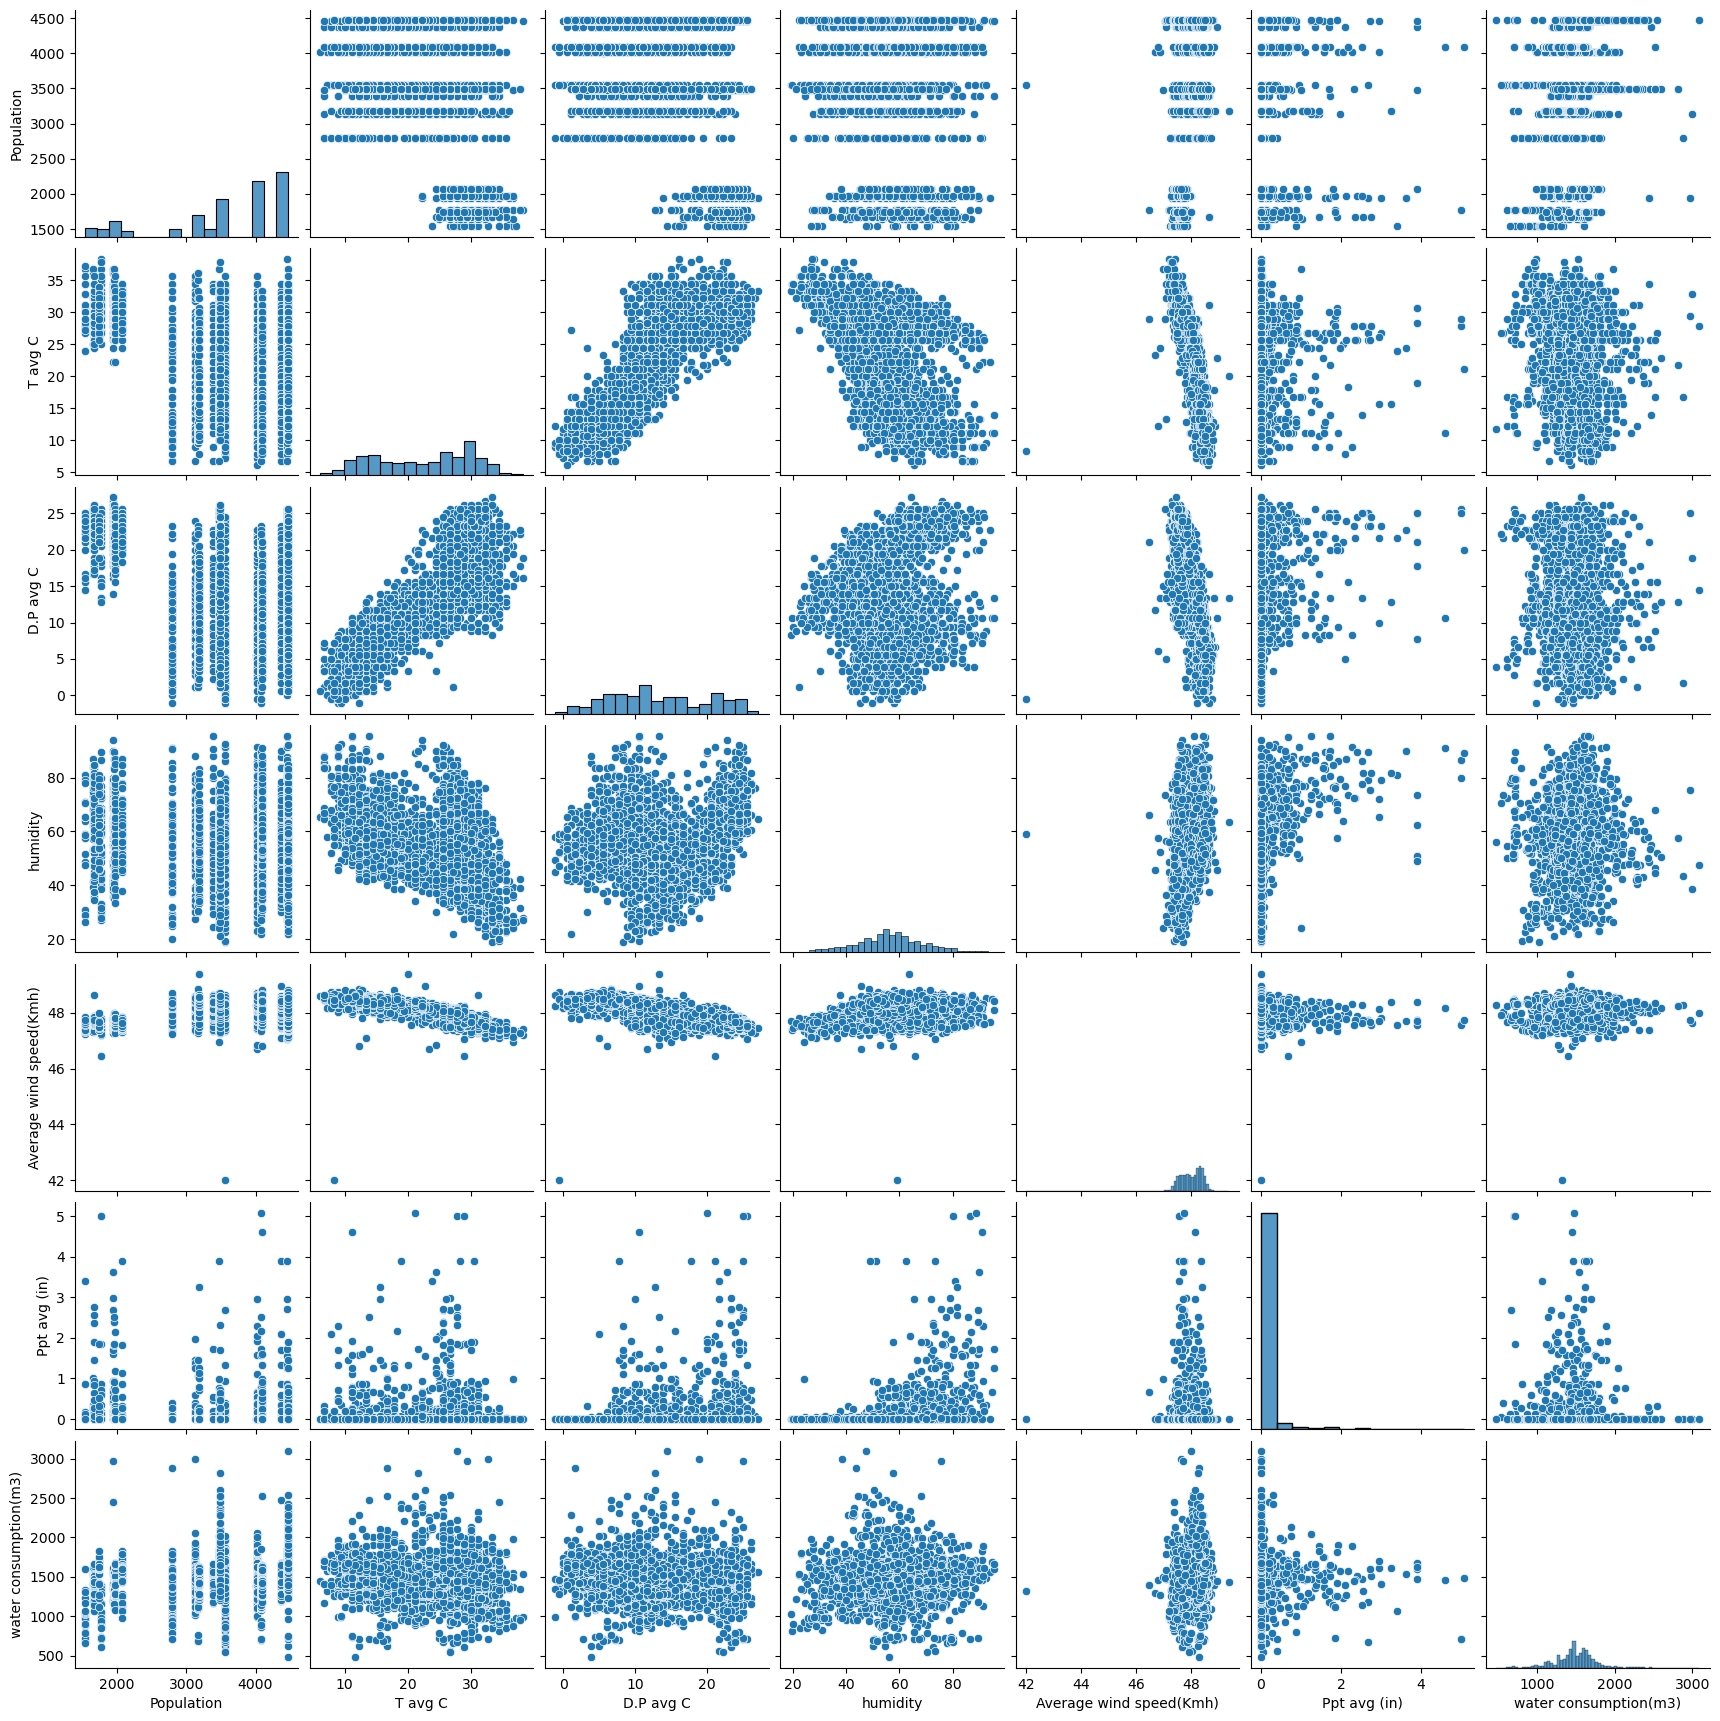

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

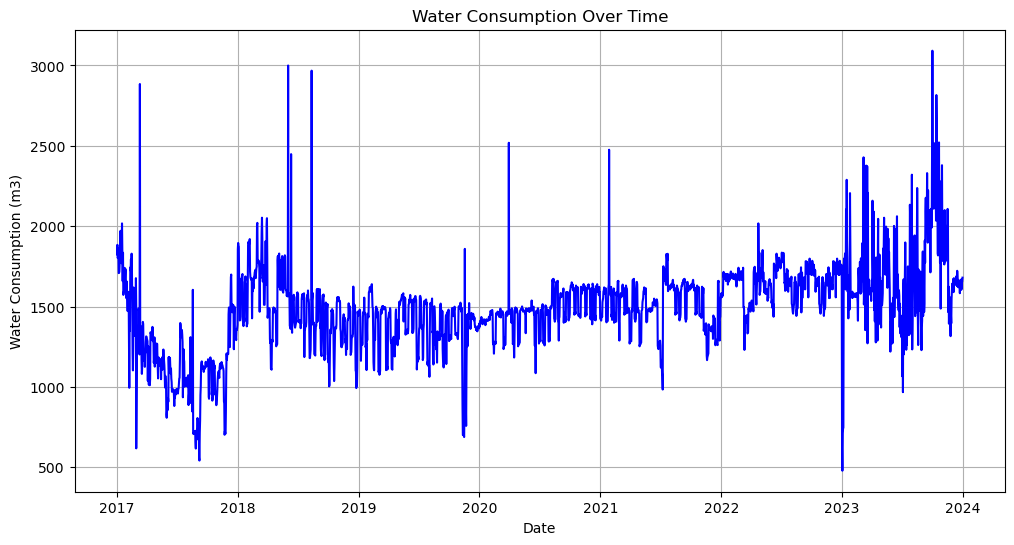

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['water consumption(m3)'], color='blue')
plt.title('Water Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Water Consumption (m3)')
plt.grid(True)
plt.show()

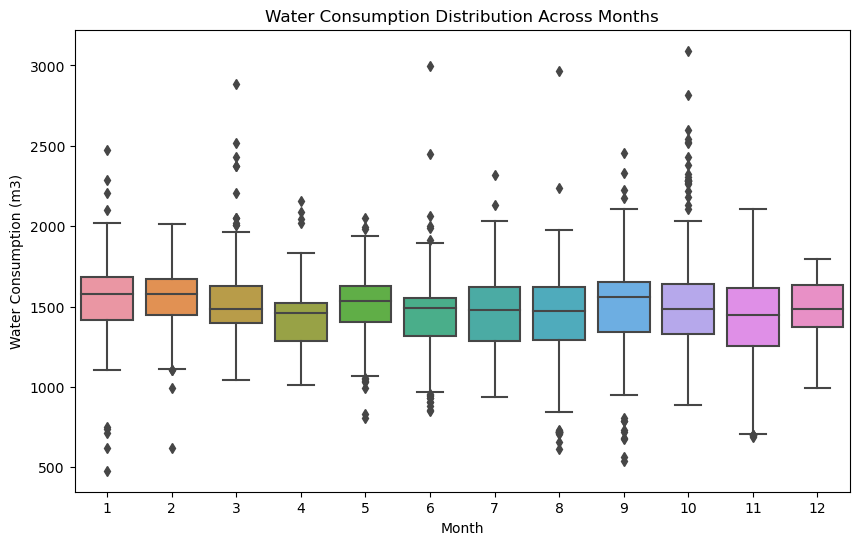

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Date'].dt.month, y=df['water consumption(m3)'])
plt.title('Water Consumption Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Water Consumption (m3)')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7504\3681065905.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


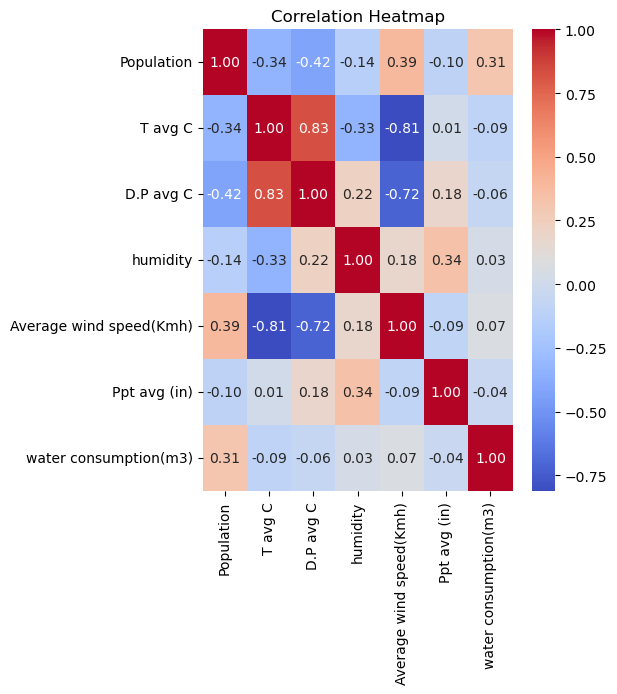

In [18]:
plt.figure(figsize=(5,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

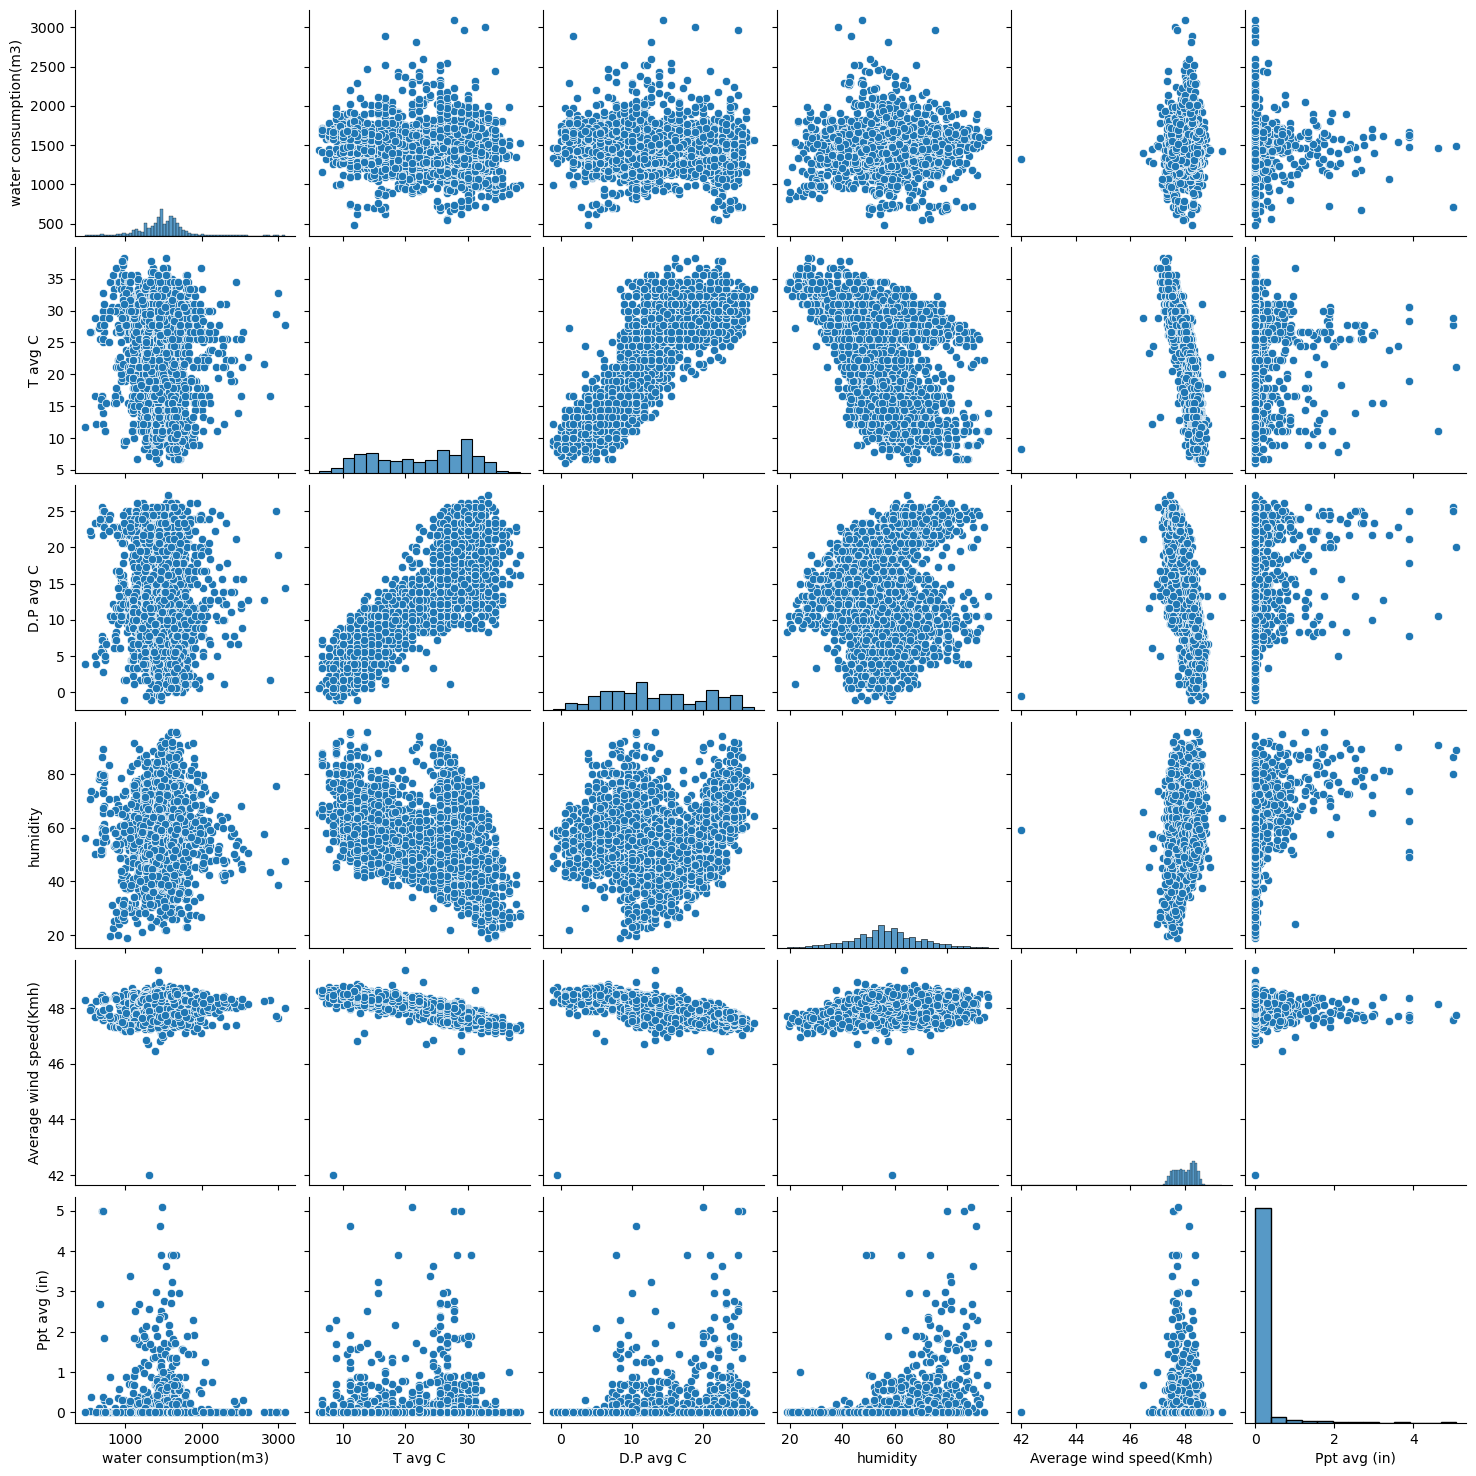

In [19]:
sns.pairplot(df[['water consumption(m3)', 'T avg C', 'D.P avg C', 'humidity', 'Average wind speed(Kmh)', 'Ppt avg (in)']])
plt.show()

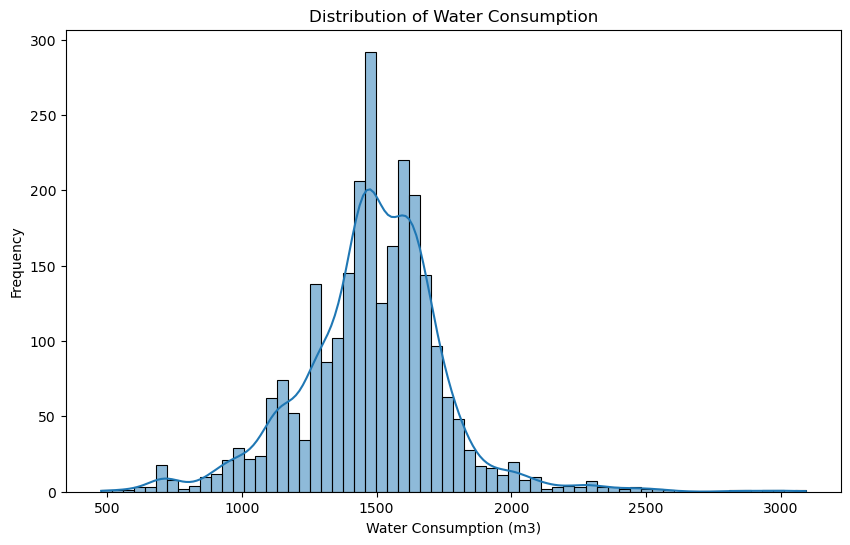

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['water consumption(m3)'], kde=True)
plt.title('Distribution of Water Consumption')
plt.xlabel('Water Consumption (m3)')
plt.ylabel('Frequency')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split data into features (X) and target variable (y)
X = df.drop(['Date', 'water consumption(m3)'], axis=1)
y = df['water consumption(m3)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

# Evaluate Linear Regression model
lr_rmse = evaluate_model(lr_model, X_test, y_test)
print("Linear Regression RMSE:", lr_rmse)

# Evaluate Random Forest model
rf_rmse = evaluate_model(rf_model, X_test, y_test)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 268.73639141655815
Random Forest RMSE: 205.51071334684167
